In [18]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [19]:
# variables declaration
nx=41
ny=41

l=1
h=1
u=1

x=numpy.linspace(0,l,nx)
y=numpy.linspace(0,h,ny)

dx=l/(nx-1)
dy=h/(ny-1)
l1_target = 1e-6


w=numpy.zeros((nx,ny))
psi=numpy.zeros((nx,ny))


In [20]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [21]:
def stokes_system(w,psi,l1_target,dx,dy,u):
    '''Performs Jacobi relaxation for the cavity flow
    
    Parameters:
    ----------
    w : 2D array of floats
        Initial guess
    psi: 2D array of floats
        Initial guess
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l1_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    psi: 2D array of float
        Distribution after relaxation
    iteration: number of iteration
    ''' 
    iteration=0
    stop1=1
    stop2=1
    
    psin = numpy.empty_like(psi)
    wn= numpy.empty_like(w)
    
    while(stop1>l1_target or stop2>l1_target):
        
        psin=psi.copy()
        wn=w.copy()
        w[1:-1,1:-1]=.25*(wn[2:,1:-1]+wn[:-2,1:-1]+w[1:-1,:-2]+wn[1:-1,2:])
        
        psi[1:-1:,1:-1]=.25*((dx**2)*wn[1:-1,1:-1]+psin[2:,1:-1] \
                             +psin[:-2,1:-1]+psi[1:-1,:-2]+psin[1:-1,2:]) 
        
        w[-1,:]=(-1/(2*(dy)**2))*(8*psi[-2,:]-psi[-3,:])-(3*u)/dy
        w[:,0]=(-1/(2*(dy)**2))*(8*psi[:,1]-psi[:,2])
        w[0,:]=(-1/(2*(dy)**2))*(8*psi[1,:]-psi[2,:])
        w[:,-1]=(-1/(2*(dy)**2))*(8*psi[:,-2]-psi[:,-3])
        
        stop1=L1norm(psi,psin)
        stop2=L1norm(w,wn)
        iteration+=1
        if iteration>6000:
            break
    return psi, iteration

In [22]:
psi,iteration = stokes_system(w,psi,l1_target,dx,dy,u)
print(iteration)


4060


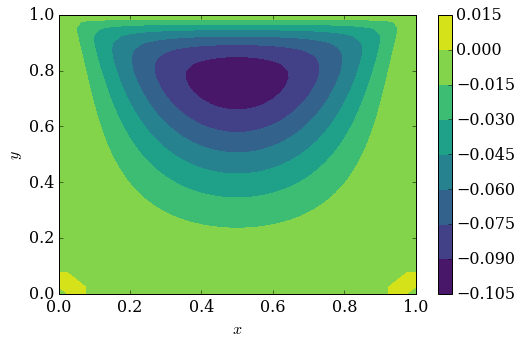

In [23]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,psi,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();
